# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

>I have decided to examine the relationship between housing afforability and minimum wage across U.S. states. I will wrangle two datasets: the HUD Fair Market Rent dataset, and the data from richstatespoorstates.org's Minimum Wage dataset. After cleaning and combining the two datasets, my question will be: How does the minimum wage in each state compare to the average rent for 1-bedroom and 2-bedroom units, and which states may have housing affordability challenges?

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File (csv)

Method: I downloaded this data manually from Data.gov. I selected the "50th Percentile Rent Estimates" dataset, published by HUD because it provided standardized Fair Market Rent (FMR) values across thousands of counties in the US, which gives me more than 3,000 data samples. This dataset is significant because it includes rent estimates for different bedroom sizes, allowing me to analyze housing affordability. 

Dataset variables:

*   **state_alpha** - two-letter state abbreviation used to aggregate rents at the state level
*   **Rent50_1** - 50th percentile rent for a 1-bedroom unit.
*   **Rent50_2** - 50th percentile rent for a 2-bedroom unit. 

In [1]:
import pandas as pd



# Loading HUD rent dataset that was manually downloaded from Data.gov
hud = pd.read_csv("/workspace/FY2014_50_Final_csv.csv")



# Inspecting to confirm more than 500 samples
print("Rows, Columns:", hud.shape)


# Keeping subset of relevant variables
hud = hud[["state_alpha", "countyname", "Rent50_1", "Rent50_2"]]

# Droppiong rows with missing state abbreviations
hud = hud.dropna(subset=["state_alpha"])

# aggregate numeric rents by state
state_rent = hud.groupby("state_alpha")[["Rent50_1", "Rent50_2"]].mean().reset_index()

# checking cleaned data
state_rent.head()



Rows, Columns: (4766, 17)


,state_alpha,Rent50_1,Rent50_2
0,AK,807.586207,1032.551724
1,AL,525.313433,658.328358
2,AR,476.666667,620.640000
3,AZ,628.866667,808.466667
4,CA,906.068966,1172.793103


#### Dataset 2

Type: HTML Table (scraped from RichStatesPoorStates.org)

Method: I gathered the data using HTML Scraping with BeautifulSoup from the website's table. This allows me to get up to date minimum wage values by state which can then be merged with the HUD Rent data. 

Dataset variables:

*   **State** - The state abbreviation or full name
*   **Value** - The current minimum wage in that state
*   **Rank** - 50th percentile rank

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL being used
url = "https://www.richstatespoorstates.org/variables/state_minimum_wage/"


# make the http request
response = requests.get(url)
response.raise_for_status()


# parsing HTML
soup = BeautifulSoup(response.text, "html.parser")


# locate table
table = soup.find("table")


# extract headers
headers = [th.get_text(strip=True) for th in table.find_all("th")]


# extract tows
rows = []
for tr in table.find_all("tr")[1:]:
    cells = [td.get_text(strip=True) for td in tr.find_all("td")]
    if cells:
        rows.append(cells)
        
# create dataframe manually
df_min_wage = pd.DataFrame(rows, columns=headers)

print(df_min_wage.head())








        State   Value  Rank
0     Alabama   $7.25   1st
1      Alaska  $11.91  28th
2     Arizona  $14.70  38th
3    Arkansas  $11.00  25th
4  California  $16.50  49th


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [ ]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [8]:
#Inspecting the dataframe visually

# visual inspection of df_min_wage
df_min_wage.head()
df_min_wage.sample(10)

,State,Value,Rank
11,Idaho,$7.25,1st
7,Delaware,$15.00,41st
14,Iowa,$7.25,1st
27,Nevada,$12.00,29th
48,Wisconsin,$7.25,1st
10,Hawaii,$14.00,35th
4,California,$16.50,49th
30,New Mexico,$12.00,29th
43,Utah,$7.25,1st
18,Maine,$14.65,37th


In [10]:
#Inspecting the dataframe programmatically
df_min_wage.info()
df_min_wage["Value"].unique()[:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   50 non-null     object
 1   Value   50 non-null     object
 2   Rank    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


array(['$7.25', '$11.91', '$14.70', '$11.00', '$16.50', '$14.81',
       '$16.35', '$15.00', '$13.00', '$14.00', '$14.65', '$10.56',
       '$11.13', '$13.75', '$10.55', '$13.50', '$12.00', '$15.49',
       '$15.50', '$10.70'], dtype=object)

Issue and justification: 

> **Issue**: The minimum wage column contains a non-numeric characeter ($). As a result, pandas reads the column as an object, instead of a numeric type. This will prevent summary statistics, comparisons between states, merging with numeric data, and plotting. 

> **Justification**: Visual inspection (head() / sample()) allows quick detection of unexpected symbols in the data. Programmatic checks (info() and unique()) validate the issue across the full dataset, and confirm the incorrect data type.

### Quality Issue 2:

In [11]:
#FILL IN - Inspecting the dataframe visually
df_min_wage.head()
df_min_wage.sample(5)

,State,Value,Rank
27,Nevada,$12.00,29th
45,Virginia,$12.41,31st
19,Maryland,$15.00,41st
8,Florida,$13.00,32nd
30,New Mexico,$12.00,29th


In [12]:
#FILL IN - Inspecting the dataframe programmatically
df_min_wage.info()
df_min_wage["Rank"].unique()[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   50 non-null     object
 1   Value   50 non-null     object
 2   Rank    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


array(['1st', '28th', '38th', '25th', '49th', '40th', '48th', '41st',
       '32nd', '35th', '37th', '23rd', '26th', '34th', '22nd', '33rd',
       '29th', '46th', '47th', '24th'], dtype=object)

Issue and justification: 

> **Issue**: Visual inspection of the dataframe show that the Rank column contains values stored as an object with ordinal strings instead of numeric values.

> **Justification**: This makes sorting, filtering, or performing mathematical comparisons difficult. Visual inspection shows the ordinal formatting, and programmatic checks confirm that all entries are objects, rather than numeric types. 

### Tidiness Issue 1:

In [13]:
#FILL IN - Inspecting the dataframe visually
state_rent.head()
state_rent.sample(5)

,state_alpha,Rent50_1,Rent50_2
38,OR,606.888889,773.916667
33,NM,598.515152,758.303030
53,WY,606.782609,768.000000
18,KY,502.641667,642.983333
23,MI,567.987952,729.915663


In [14]:
#FILL IN - Inspecting the dataframe programmatically
state_rent.info()
state_rent.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state_alpha  54 non-null     object 
 1   Rent50_1     54 non-null     float64
 2   Rent50_2     54 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


Index(['state_alpha', 'Rent50_1', 'Rent50_2'], dtype='object')

Issue and justification: 

> **Issue**: The dataset has different columns for Rent50_1 and Rent50_2, representing 1 and 2 bedroom rents, instead of a single "rent" column with a separate column for bedroom size.

> **Justification**: Tidy data principle recommend that each variable should have its own column. Here, "Rent amount" and "bedroom size" are conceptually separate variables, so keeping them in separate columns complicates analyses that compare rent across bedroom sizes. Reshaping to a long format would makle plotting and aggregations easier. 

### Tidiness Issue 2: 

In [15]:
#FILL IN - Inspecting the dataframe visually
state_rent.head()
state_rent.sample(5)

,state_alpha,Rent50_1,Rent50_2
14,ID,534.659091,682.818182
37,OK,507.987013,653.532468
27,MT,530.928571,672.678571
15,IL,580.127451,741.892157
17,KS,527.533333,682.895238


In [16]:
#FILL IN - Inspecting the dataframe programmatically
state_rent.nunique()
state_rent.shape

(54, 3)

Issue and justification: 

> **Issue**: The dataset aggregates county-level observations into a single row per state, combining multiple counties into one summary row.

> **Justification**: Again, Tidy Data principles reqiore that each obsercational unit be its own row. Aggregating to the state level removes county-level details, which limits analyses that need finer granularity. Keeping separate tables for county-level and state-level data would maintain a tidy structure and allow analysis at multiple levels. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [17]:
#  Make copies of the datasets to ensure the raw dataframes 
# are not impacted

# Copy of raw datasets
import pandas as pd
state_rent_clean = state_rent.copy()
df_min_wage_clean = df_min_wage.copy()

### **Quality Issue 1: Wage Values Contain Dollar Signs**

In [18]:
# FILL IN - Apply the cleaning strategy

# Remove dollar signs and convert Value to numeric
df_min_wage_clean["Value"] = df_min_wage_clean["Value"].str.replace("$", "", regex=False).astype(float)

In [19]:
# FILL IN - Validate the cleaning was successful

# Checking that Value is now showing as numeric
df_min_wage_clean.info()
df_min_wage_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   50 non-null     object 
 1   Value   50 non-null     float64
 2   Rank    50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,State,Value,Rank
0,Alabama,7.25,1st
1,Alaska,11.91,28th
2,Arizona,14.70,38th
3,Arkansas,11.00,25th
4,California,16.50,49th


Justification: Removing the dollar sign converts the column to numeric, enabling calculations, comparisons, and visualizations. 

### **Quality Issue 2: Rank Column Stored as Object**

In [20]:
#FILL IN - Apply the cleaning strategy

# Remove ordinal suffixes and conver Rank to integer
df_min_wage_clean["Rank"] = df_min_wage_clean["Rank"].str.replace(r'(st|nd|rd|th)', '', regex=True).astype(int)

In [21]:
#FILL IN - Validate the cleaning was successful

# Check rank type
df_min_wage_clean.info()
df_min_wage_clean["Rank"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   50 non-null     object 
 1   Value   50 non-null     float64
 2   Rank    50 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


array([ 1, 28, 38, 25, 49, 40, 48, 41, 32, 35, 37, 23, 26, 34, 22, 33, 29,
       46, 47, 24, 27, 36, 31, 50, 21])

Justification: Converting Rank to numeric allows sorting, filtering, and mathematical comparisons. 

### **Tidiness Issue 1:Rent Columns in Wide Format**

In [34]:
#FILL IN - Apply the cleaning strategy
state_rent_clean = state_rent.copy()

# Melt state_rent dataset to long format
state_rent_clean = state_rent_clean.melt(
    id_vars=["state_alpha"],
    value_vars=["Rent50_1", "Rent50_2"],
    var_name="bedroom_size",
    value_name="rent_amount"
)


# Convert bedroom_size to numeric
state_rent_clean["bedroom_size"] = state_rent_clean["bedroom_size"].str[-1].astype(int)



In [35]:
#FILL IN - Validate the cleaning was successful

# validating cleaned dataset
print(state_rent_clean.head())
print(state_rent_clean.info())

  state_alpha  bedroom_size  rent_amount
0          AK             1   807.586207
1          AL             1   525.313433
2          AR             1   476.666667
3          AZ             1   628.866667
4          CA             1   906.068966
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_alpha   108 non-null    object 
 1   bedroom_size  108 non-null    int64  
 2   rent_amount   108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB
None


Justification: Each variable (rent amount and bedroom size) is now in its own column , making analysis and plotting easier.

### **Tidiness Issue 2: Aggregation of County-Level Data**

In [36]:
#FILL IN - Apply the cleaning strategy

# check unique states and bedroom sizes
state_rent_clean["state_alpha"].nunique()
state_rent_clean["bedroom_size"].nunique()

# check unique states and bedroom sizes
print("Number of unique states:", state_rent_clean["state_alpha"].nunique())

print("Number of unique bedroom sizes:", state_rent_clean["bedroom_size"].nunique())


Number of unique states: 54
Number of unique bedroom sizes: 2


In [37]:
#FILL IN - Validate the cleaning was successful

print(state_rent_clean.info())
print(state_rent_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_alpha   108 non-null    object 
 1   bedroom_size  108 non-null    int64  
 2   rent_amount   108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB
None
  state_alpha  bedroom_size  rent_amount
0          AK             1   807.586207
1          AL             1   525.313433
2          AR             1   476.666667
3          AZ             1   628.866667
4          CA             1   906.068966


Justification: The dataset is now structures so that each row repersents a single observational unit: a state-bedroom combination. This satisfies tidy data principles because each variable (state_alpha, bedroom_size, and rent_amount) has its own column, and each observational unit is in its own row. Aggregating county-level data at the state level preserves state-level analysis while keeping the data tidy and analysis-ready. 

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [40]:
#FILL IN - Remove unnecessary variables and combine datasets

# State names differ between datasets, need to map full state names to abbreviations:
state_to_abbrev = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS',
    'Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA',
    'Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT',
    'Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM',
    'New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK',
    'Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
    'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
    'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

# creating new column with abbreviations
df_min_wage_clean['state_abbrev'] = df_min_wage_clean['State'].map(state_to_abbrev)

# for df_min_wage_clean, keeping only State, Value, and Rank, state_abbrev
df_min_wage_clean = df_min_wage_clean[["State", "Value", "Rank", "state_abbrev"]]

# for state_rent_clean, keeping only state_alpha, bedroom_size, and rent_amount
state_rent_clean = state_rent_clean[["state_alpha", "bedroom_size", "rent_amount"]]


# merge datasets using abbreviation of state
combined_data = pd.merge(
    df_min_wage_clean,
    state_rent_clean,
    left_on="state_abbrev",
    right_on="state_alpha",
    how="inner"
)


# drop redundant column
combined_data = combined_data.drop(columns=["state_alpha", "state_abbrev"])


# validate combined_data
print(combined_data.head())
print(combined_data.info())

     State  Value  Rank  bedroom_size  rent_amount
0  Alabama   7.25     1             1   525.313433
1  Alabama   7.25     1             2   658.328358
2   Alaska  11.91    28             1   807.586207
3   Alaska  11.91    28             2  1032.551724
4  Arizona  14.70    38             1   628.866667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         100 non-null    object 
 1   Value         100 non-null    float64
 2   Rank          100 non-null    int64  
 3   bedroom_size  100 non-null    int64  
 4   rent_amount   100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB
None


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [44]:
#FILL IN - saving data


import os

# creating new directory for data
os.makedirs("/workspace/data", exist_ok=True)

# saving raw datasets
df_min_wage.to_csv("/workspace/data/raw_min_wage.csv", index=False)
hud.to_csv("/workspace/data/raw_hud_rent.csv", index=False)


# saving cleaned individual datasets as well 
df_min_wage_clean.to_csv("/workspace/data/clean_min_wage.csv", index=False)
state_rent_clean.to_csv("/workspace/data/clean_hud_rent.csv", index=False)



# saving final merged dataset
combined_data.to_csv("/workspace/data/merged_min_wage_rent.csv", index=False)

# print confirmation
print("Raw and cleaned datasets were saved successfully in /workspace/data/")

Raw and cleaned datasets were saved successfully in /workspace/data/


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How does the minimum wage in each state compare to the average rent for 1-bedroom and 2-bedroom units, and which states may have housing affordability challenges?

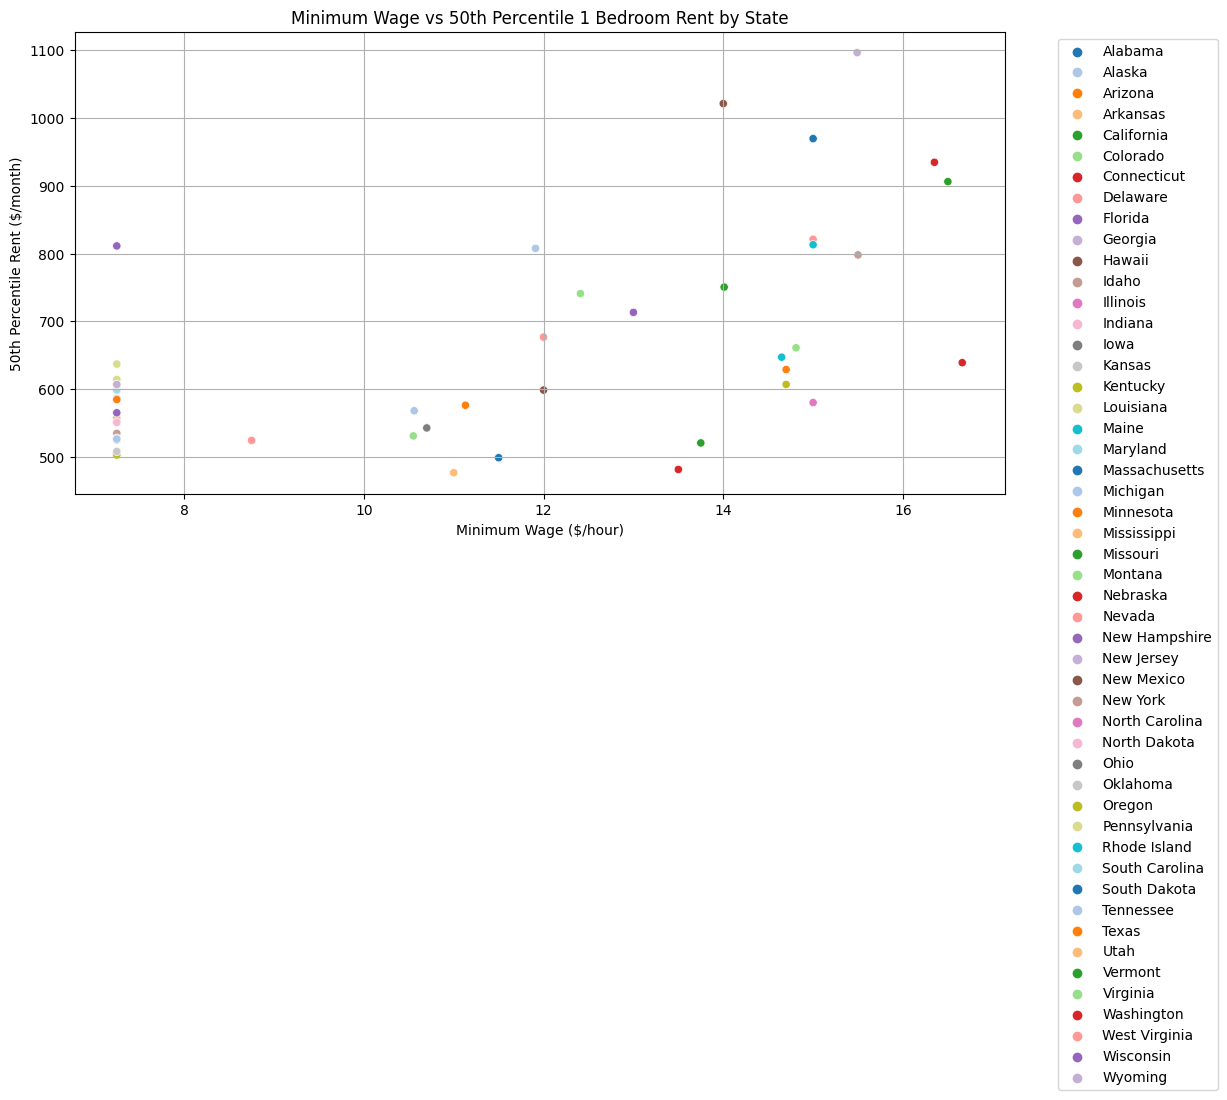

In [45]:
#Visual 1 - Minimum Wage vs Rent (1-Bedroom)

import matplotlib.pyplot as plt
import seaborn as sns

# filtering dataset for 1 bedroom units
rent_1bed = combined_data[combined_data['bedroom_size'] == 1]

plt.figure(figsize=(12,6))
sns.scatterplot(data=rent_1bed, x='Value', y='rent_amount', hue='State', palette='tab20')
plt.title("Minimum Wage vs 50th Percentile 1 Bedroom Rent by State")
plt.xlabel("Minimum Wage ($/hour)")
plt.ylabel("50th Percentile Rent ($/month)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.show()



*Answer to research question:* States with higher minimum wage (e.g. California, Washington, Massachusetts) tend to also have higher 1 bedroom unit rents. Some states with low minimum wage still have relatively high rent, suggesting potential affordability issues.

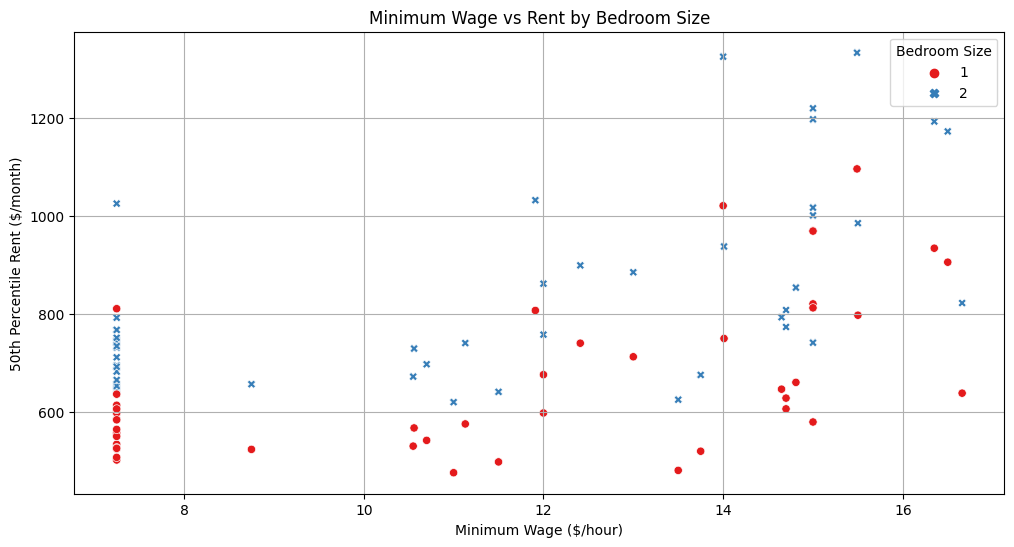

In [46]:
#Visual 2 - Minimum Wage vs Rent by Bedroom Size

plt.figure(figsize=(12,6))
sns.scatterplot(data=combined_data, x='Value', y='rent_amount', hue='bedroom_size', style='bedroom_size', palette='Set1')
plt.title("Minimum Wage vs Rent by Bedroom Size")
plt.xlabel("Minimum Wage ($/hour)")
plt.ylabel("50th Percentile Rent ($/month)")
plt.legend(title='Bedroom Size')
plt.grid(True)
plt.show()                

*Answer to research question:* Rent increases with bedroom size across all states. The relationship between minimum wage and rent is roughly positive in the sense that states with higher wages tend to have higher rents. The above visualization helps identify states where minimum wage may not cover typical rent, highlighting affordability gaps. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete my work, I would probably explore county-level rent data instead of just state averages to capture local affordability differences more accurately. I would also investigate seasonal or yearly trends in rent and minimum wage to see if the relationship changes over time. Additionally, I would refine the analysis by calculating the affordability metrics, like the percentage of income required to cover rent, and explore how factors like cost of living or employment rates affect affordability across states. 